# Variational Bayesian Inference

In this notebook, we will review the variational Bayes process, beginning with a technical introduction to the formalism and derivation, followed by a python implementation. 
The material covered here references Blei et al., 2018, Varitional Inference: A Review for Statisticians and Chappel et al., 2016. The FMRIB Variational Bayes Tutorial. 


## Technical Overview

### Problem Statement 

Similarly to problems addressed by sampling methods, the goal of variational inference (VI) is to approximate parameter distributions from data, specifically in cases where an analytical treatment is intractable. 

Consider the following example (from Blei et al., 2018): 

For latent variabels $\mathbf{z} = z_{1:m}$ and observations $\mathbf{x} = x_{1:n}$, the posterior conditional density is given by : 

$$ p(\mathbf{z} \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid \mathbf{z}) * p(\mathbf{z})}{p(\mathbf{x})} $$

The denominator, ${p(\mathbf{x})}$, whose value is needed to compute the posterior, is calculated by: 

$$ {p(\mathbf{x})} = \int p(\mathbf{z} , \mathbf{x}) dz $$


This integral is often intractable or too computationally expensive to be feasible. For similar reasons (notably the number of latent variables)sampling methods are slow to converge.

VI aims to circumvent the large time complexity by approaching the problem through optimisation. 

The process begins by positing a contrived _approximate_ density, $\mathfrak{D}$ of latent variables $\mathbf{z}$. Then, using this density can find a set of valuers for $q(\mathbf{z}) \in \mathfrak{D}$ whose values maximise the Kullback-Liebler divergence between the approximate density and the true posterior. 

$$ q^{*}(\mathbf{z}) = \underset{q(\mathbf{z}) \in \mathfrak{D}}{argmin} \mathrm{KL}(q(\mathbf{z}) \mid \mid p(\mathbf{z} \mid \mathbf{x})) $$


### VI Computation 

To compute the optimsation problem stated above requires we do manipulation of the terms. This is because the problem is still dependent on the _evidence_ term ($p(\mathbf{x})$; recall, the intragral of this is often difficult/intractable). To see this clearly, we can rewrite out expression using Bayes rule: 

$$ q^{*}(\mathbf{z}) = \underset{q(\mathbf{z}) \in \mathfrak{D}}{argmin} \mathrm{KL}\bigg(q(\mathbf{z}) \mid \mid \frac{p(\mathbf{z}, \mathbf{x})}{p(\mathbf{x})}\bigg) $$

We can avoid evidence term using the following manipulations. First, let's break down the KL divergence: 

$$ KL(q(\mathbf{z}) \mid \mid p(\mathbf{z} \mid \mathbf{x})) = \mathbb{E}[\log q(\mathbf{z})] - \mathbb{E}[\log p(\mathbf{z} \mid \mathbf{x})] + \log p(\mathbf{x}) $$

Observing that the evidence term is constant and additive, we can formulate the Evidence Lower Bound (ELBO) as: 


\begin{align}
 ELBO(q) &= - KL(q(\mathbf{z}) \mid \mid p(\mathbf{z} \mid \mathbf{x})) - \log p(\mathbf{x}) \\
 
         &= \mathbb{E}[\log p(\mathbf{z}, \mathbf{x})] - \mathbb{E}[\log q(\mathbf{z})]
\end{align}

Note that, maximsing the ELBO is the same as minimising the KL divergence. 

By exanding the joint probaibility, we can rewrit the ELBO in terms of the log likelihood and KL divergence between our prior $p(\mathbf{z})$ and our variational density $q(\mathbf{z})$: 

\begin{align}
ELBO(q) &= \mathbb{E}[\log p(\mathbf{x} \mid \mathbf{z})] + \mathbb{E}[\log p(\mathbf{z})] - \mathbb{E}[\log q(\mathbf{z})] \\

&= \mathbb{E}[\log p(\mathbf{x} \mid \mathbf{z}) - KL(q(\mathbf{z}) \mid \mid p(\mathbf{z}))
\end{align}





### Generalisation for Non-Linear Models

We can use this formulation of the ELBO to compare nonlinear models. 

### Set-up

$$ \mathbf{y} = \mathbf{g} + \epsilon $$ 

$$ \mathbf{g} = \{g(\theta_{1}), . . ., g(\theta_{k})\} $$

$$ \epsilon \approx \mathcal{N}(0, \Phi^{-1}) $$ 

$$ \Phi = \{\phi_1, . . ., \phi_n\} $$

Where $\mathbf{y}$ is a vector of N observation assumed to be generated by a nonlinear forward function $g(\theta) + \epsilon $ 

We can parameterise the log-likelihood as multivariate normal distribution, with the data conditioned on parameters:

$$ p(\mathbf{y} \mid \mathbf{\Theta}) = \frac{N}{2} \log(\Phi) - \frac{1}{2}(\mathbf{y} - \mathbf{g})^{T} \Phi (\mathbf{y} - \mathbf{g}) $$

Where \Theta is the set of independent parameters. We factorise the approximate posterior accordingly: 

$$ q(\Theta \mid \mathbf{y}) = q(\theta_n)q(\phi_n) $$ 

Where, 

$$ q(\theta \mid \mathbf{y}) \approx MVN(\theta; \mathbf{m}, \Lambda^{-1}) $$ 

$$ q(\phi \mid \mathbf{y}) \approx Ga(\phi; s, c) $$ 

Using these, we can construct the log posterior and thus update equations. 


\begin{align}

L &= p(\mathbf{y} \mid \mathbf{\Theta}) + \log p(\theta) + \log p(\phi)
\\
\\

&= \frac{N}{2} \log(\Phi) - \frac{1}{2}(\mathbf{y} - \mathbf{g})^{T} \Phi (\mathbf{y} - \mathbf{g}) 
\\
&- \frac{1}{2}(\theta - \mathbf{m_0})^{T} \Lambda_0 (\theta - \mathbf{m_0})
\\
&(c_0)\log\phi - \frac{1}{s_0} \phi
\\
&const(\Theta)

\end{align}


### Model Definition 

We will work with an exponential decay model to explore the variational Bayes framework

$$ y = ae^{-\lambda t} + \epsilon $$
$$ \epsilon = \mathcal{N}(0,\phi^{1}) $$

We can define this using a simple lambda function and some parameter values. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
f = lambda a, l: a * np.exp(-l * t)

a = 42
l = 1.5
t = np.linspace(0,20,100)

phi = 100 

In [67]:
model = f(a, l)
data = f(a, l) + np.random.normal(0, np.sqrt(1/10), t.shape[0])

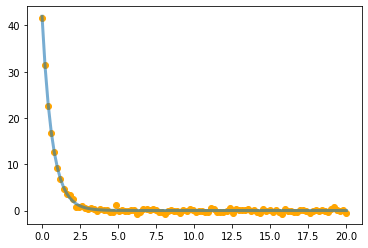

In [68]:
plt.plot(t, model, linewidth = 3, alpha = 0.6)
plt.scatter(t, data, c = 'orange')
plt.show()

#### Forward Model Specification

We can set up a forard model in the following way:

$$ \mathbf{y} = \mathbf{g} + \epsilon $$ 

$$ \mathbf{g} = \{g(\theta_{1}), . . ., g(\theta_{k})\} $$

$$ \epsilon \approx \mathcal{N}(0, \Phi^{-1}) $$ 

$$ \Phi = \{\phi_1, . . ., \phi_n\} $$

Where $\mathbf{y}$ is a vector of N observation assumed to be generated by a nonlinear forward function $g(\theta) + \epsilon $ with $k$ parameters, \theta, and $k$ precision parameters, $\phi$. 

#### Inference Specification

Using this forward model, we can parameterise the log-likelihood as multivariate normal distribution, with the data conditioned on parameters:

$$ p(\mathbf{y} \mid \mathbf{\Theta}) = \frac{N}{2} \log(\Phi) - \frac{1}{2}(\mathbf{y} - \mathbf{g})^{T} \Phi (\mathbf{y} - \mathbf{g}) $$

Where \Theta is the set of independent parameters. We factorise the approximate posterior accordingly: 

$$ q(\Theta \mid \mathbf{y}) = q(\theta_n)q(\phi_n) $$ 

Where, 

$$ q(\theta \mid \mathbf{y}) \approx MVN(\theta; \mathbf{m}, \Lambda^{-1}) $$ 

$$ q(\phi \mid \mathbf{y}) \approx Ga(\phi; s, c) $$ 

Using these, we can construct the log posterior and thus update equations. 


\begin{align}

L &= p(\mathbf{y} \mid \mathbf{\Theta}) + \log p(\theta) + \log p(\phi)
\\
\\

&= \frac{N}{2} \log(\Phi) - \frac{1}{2}(\mathbf{y} - \mathbf{g})^{T} \Phi (\mathbf{y} - \mathbf{g}) 
\\
&- \frac{1}{2}(\theta - \mathbf{m_0})^{T} \Lambda_0 (\theta - \mathbf{m_0})
\\
&(c_0)\log\phi - \frac{1}{s_0} \phi
\\
&const(\Theta)

\end{align}
